In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the csv
customer_df = pd.read_csv('customer_value_analysis.csv')


In [2]:
# Display the first 5 rows
# print(customer_df.head())

# Display the shape 
# print(customer_df.shape)

# Display df information
#display(customer_df.info())
display(customer_df)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
# Rename columns to follow snake case
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

# Check NaN values per column
print(customer_df.isna().sum())

# Drop any ID column if exists
id_col = 'customer'  
if id_col in customer_df.columns:
    customer_df = customer_df.drop(columns=[id_col])

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


In [4]:
# Function to separate numerical and categorical columns
def separate_data_types(df):
    numerical_df = df.select_dtypes(include=[np.number])
    categorical_df = df.select_dtypes(exclude=[np.number])
    return numerical_df, categorical_df

In [5]:
# Separate the dataframe
numerical_df, categorical_df = separate_data_types(customer_df)

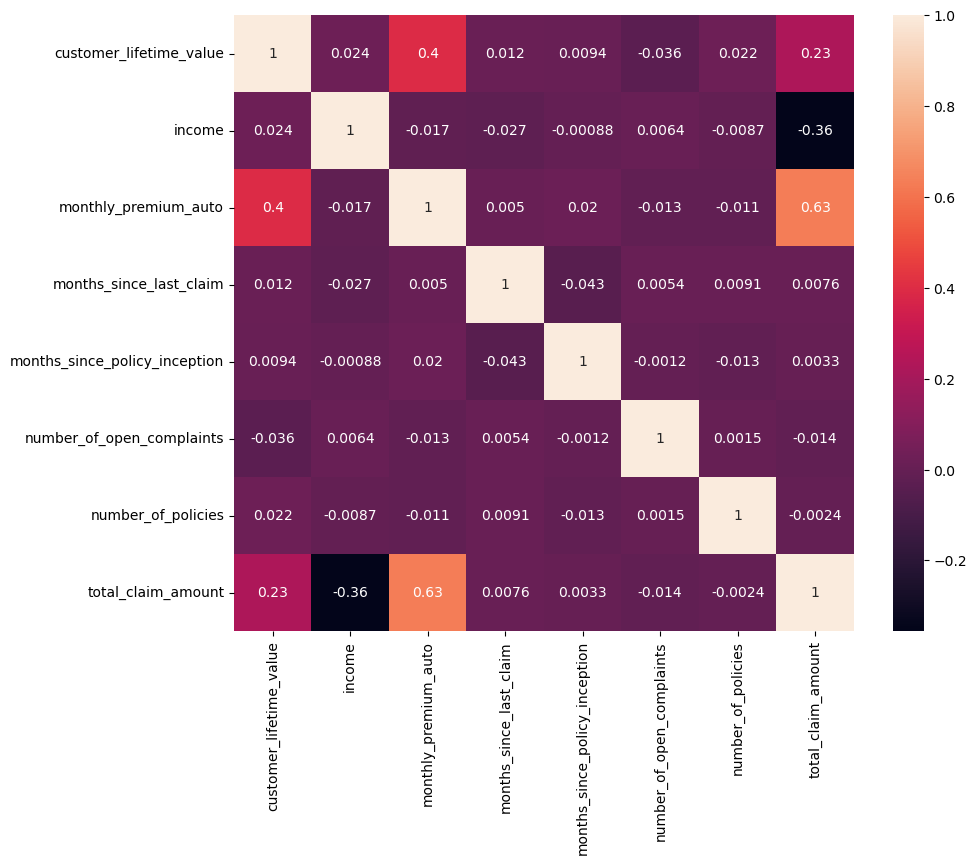

In [6]:
correlation_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Size of the figure
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#Pair with highest correlation visually is: monthly_premium_auto VS total_claim_amount
#with a correlation value of : 0.63

In [7]:
display(numerical_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [8]:
def discrete_or_continuous(df, threshold=36):
    # create empty df
    discrete_df = pd.DataFrame()
    continuous_df = pd.DataFrame()
    
    # for all collumns check if unique with 36 threshold and triage discrete vs continous
    for col in df.columns:
        if df[col].nunique() > threshold:
            continuous_df[col] = df[col]
        else:  
            discrete_df[col] = df[col]
    
    return discrete_df, continuous_df

In [9]:

discrete_df, continuous_df = discrete_or_continuous(numerical_df)

In [10]:
display(discrete_df)

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


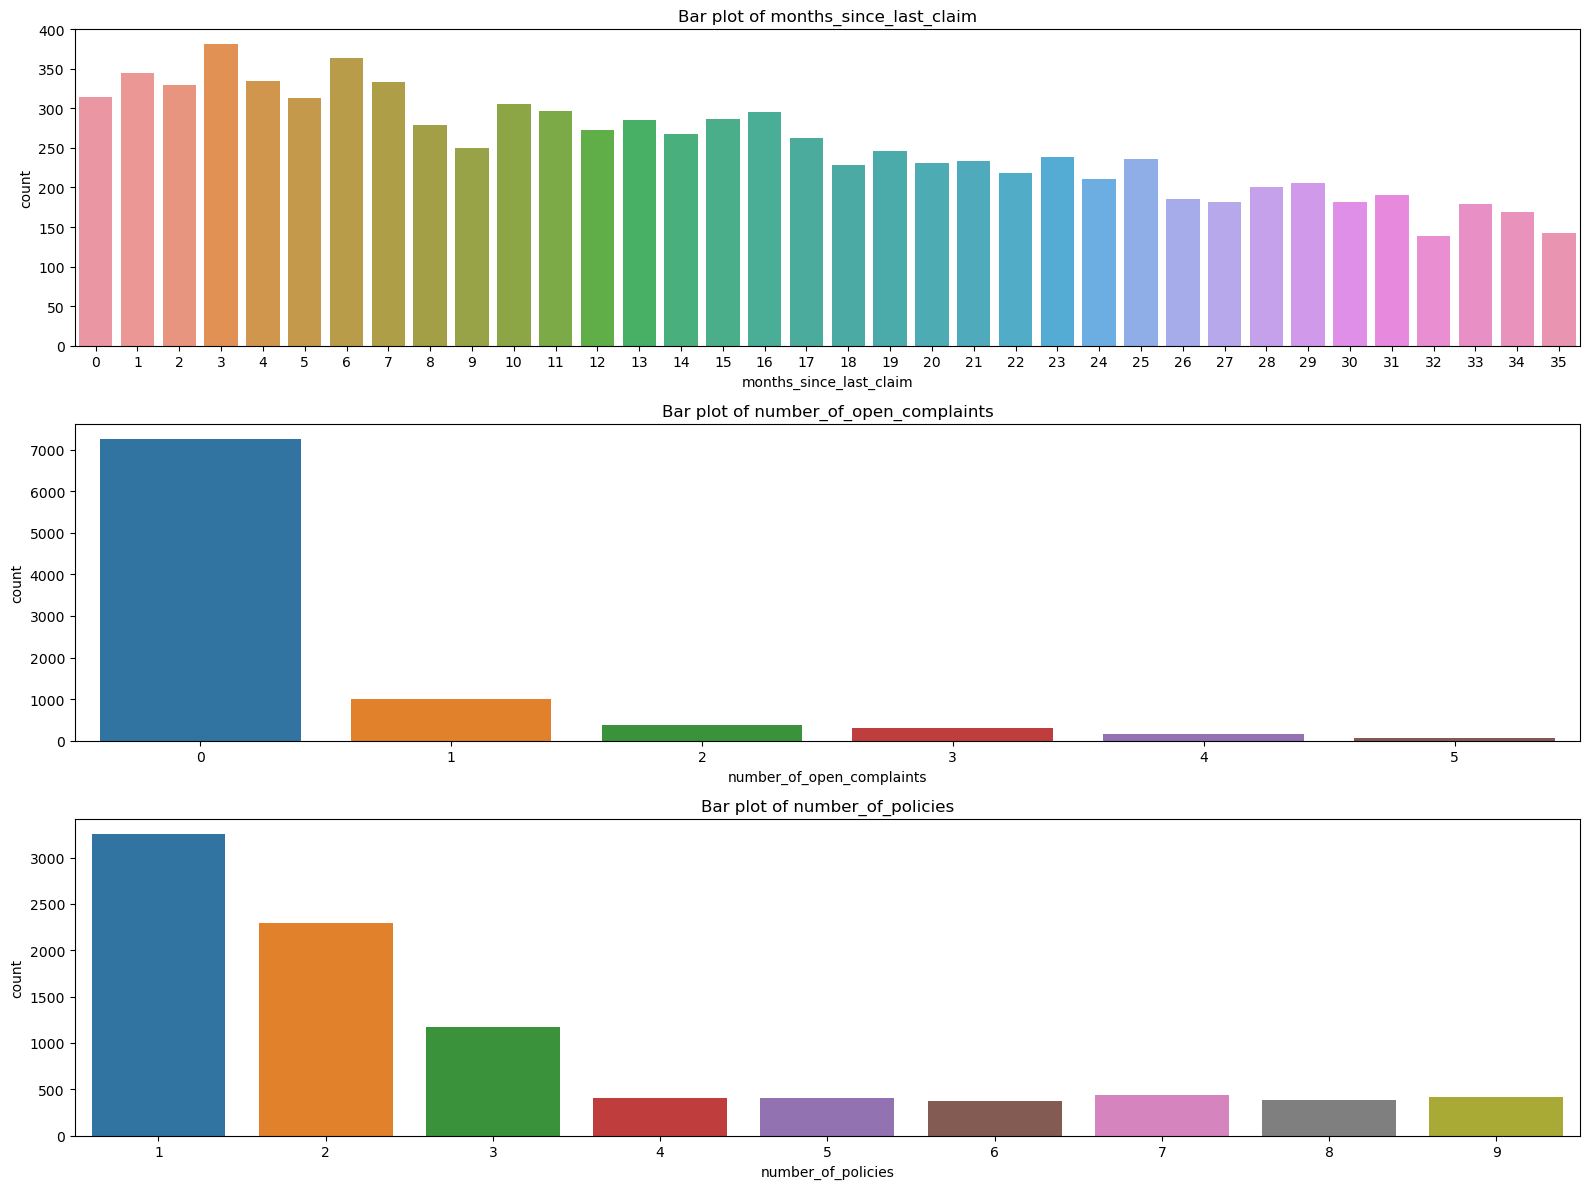

In [11]:
def plot_discrete_bars(df):
    """
    Creates bar plots for all columns in a discrete dataframe.

    Parameters:
    df (DataFrame): DataFrame containing discrete data.
    """
    num_cols = len(df.columns)
    fig_height = num_cols * 4
    fig, axes = plt.subplots(num_cols, 1, figsize=(16, fig_height))

    for i, col in enumerate(df.columns):
        sns.countplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Bar plot of {col}')

    plt.tight_layout()
    plt.show()

# display discrete columns
plot_discrete_bars(discrete_df)

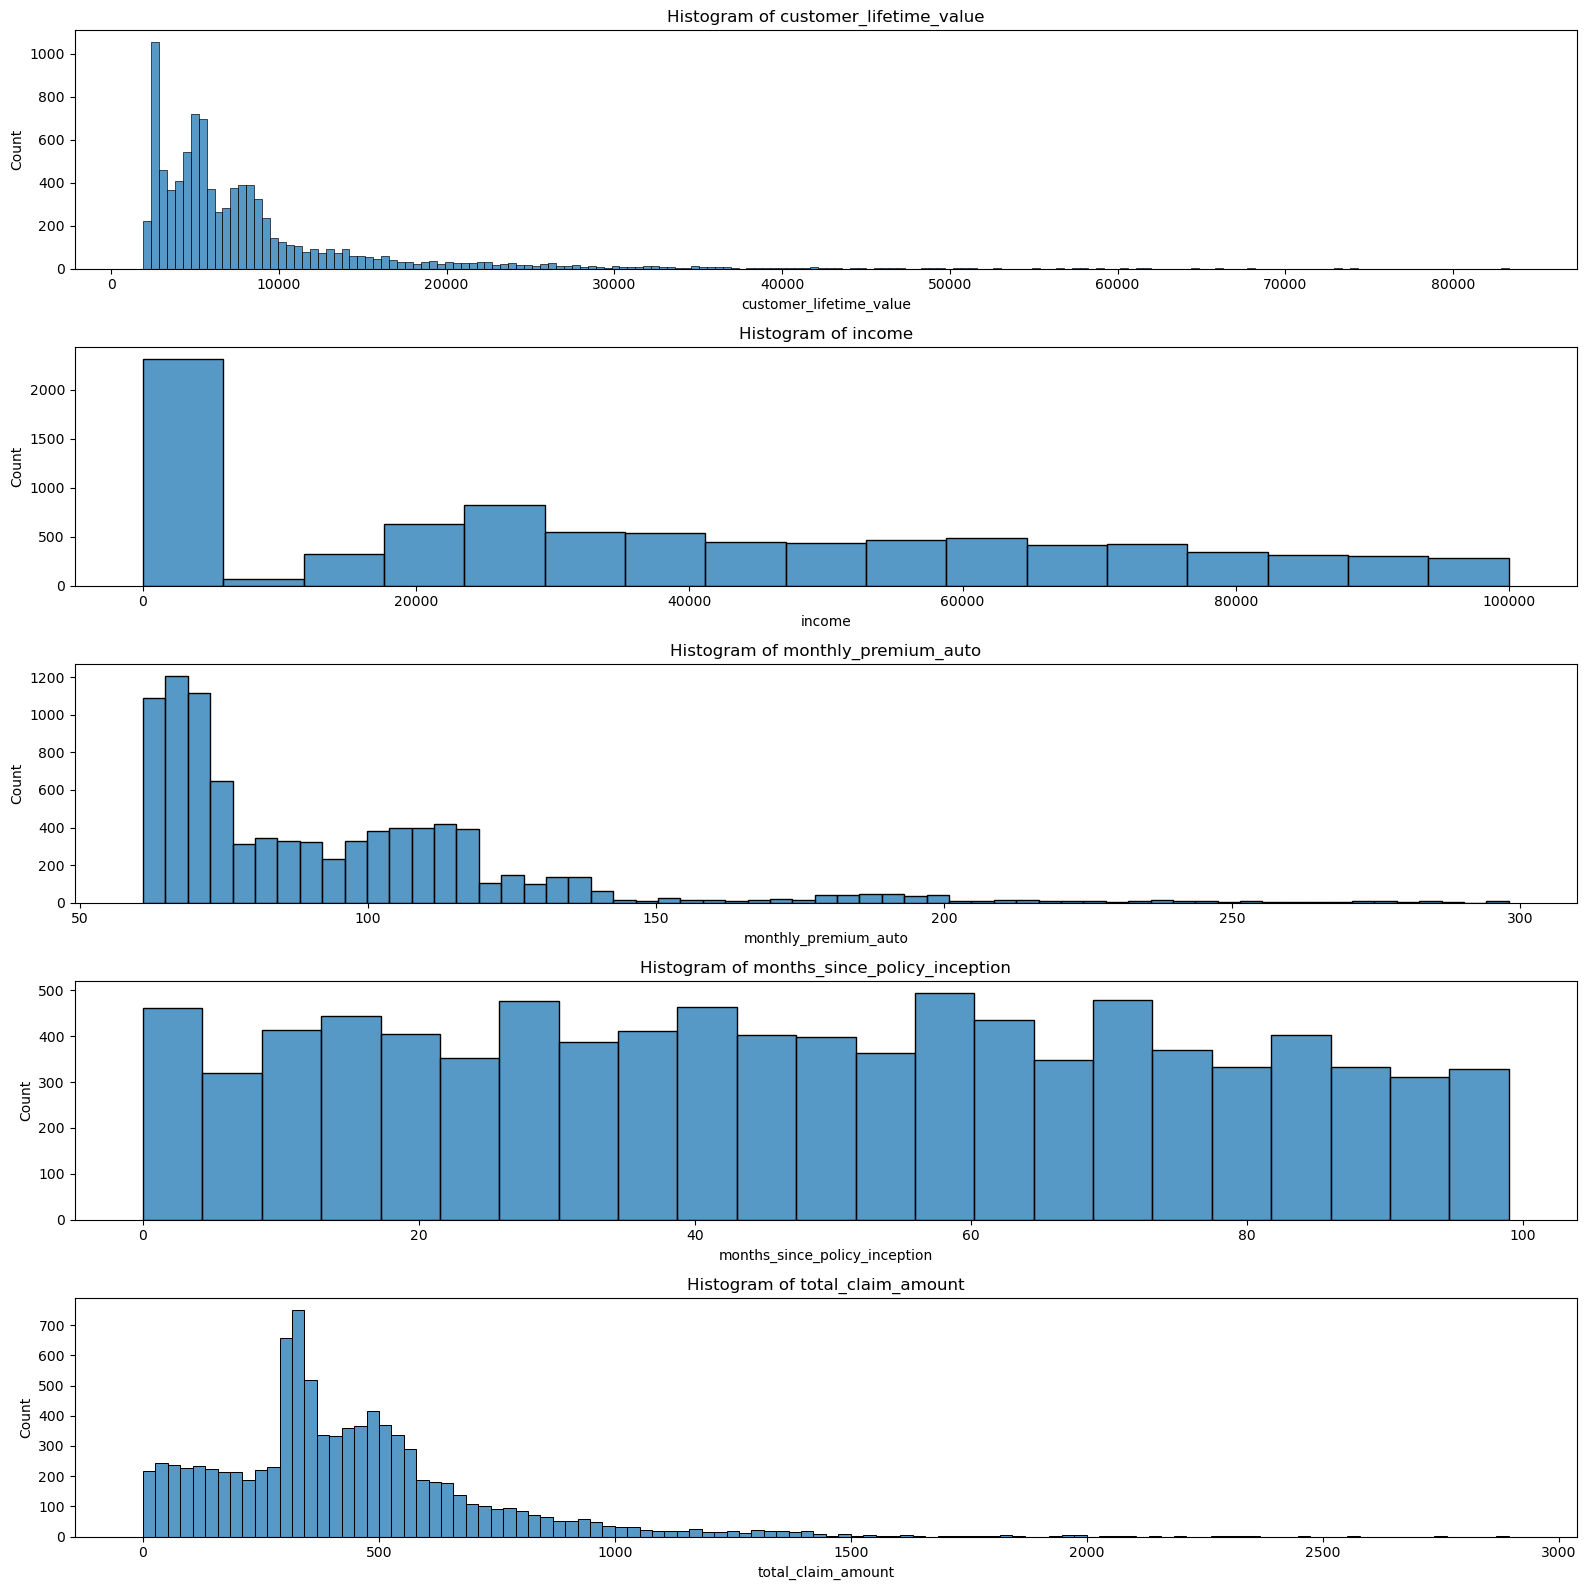

In [12]:
def plot_continuous_histograms(df):
    """
    Creates histograms for all columns in a continuous dataframe.

    Parameters:
    df (DataFrame): DataFrame containing continuous data.
    """
    num_cols = len(df.columns)
    fig, axes = plt.subplots(num_cols, 1, figsize=(16, 16))

    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')

    plt.tight_layout()
    plt.show()

# Display continuous values
plot_continuous_histograms(continuous_df)

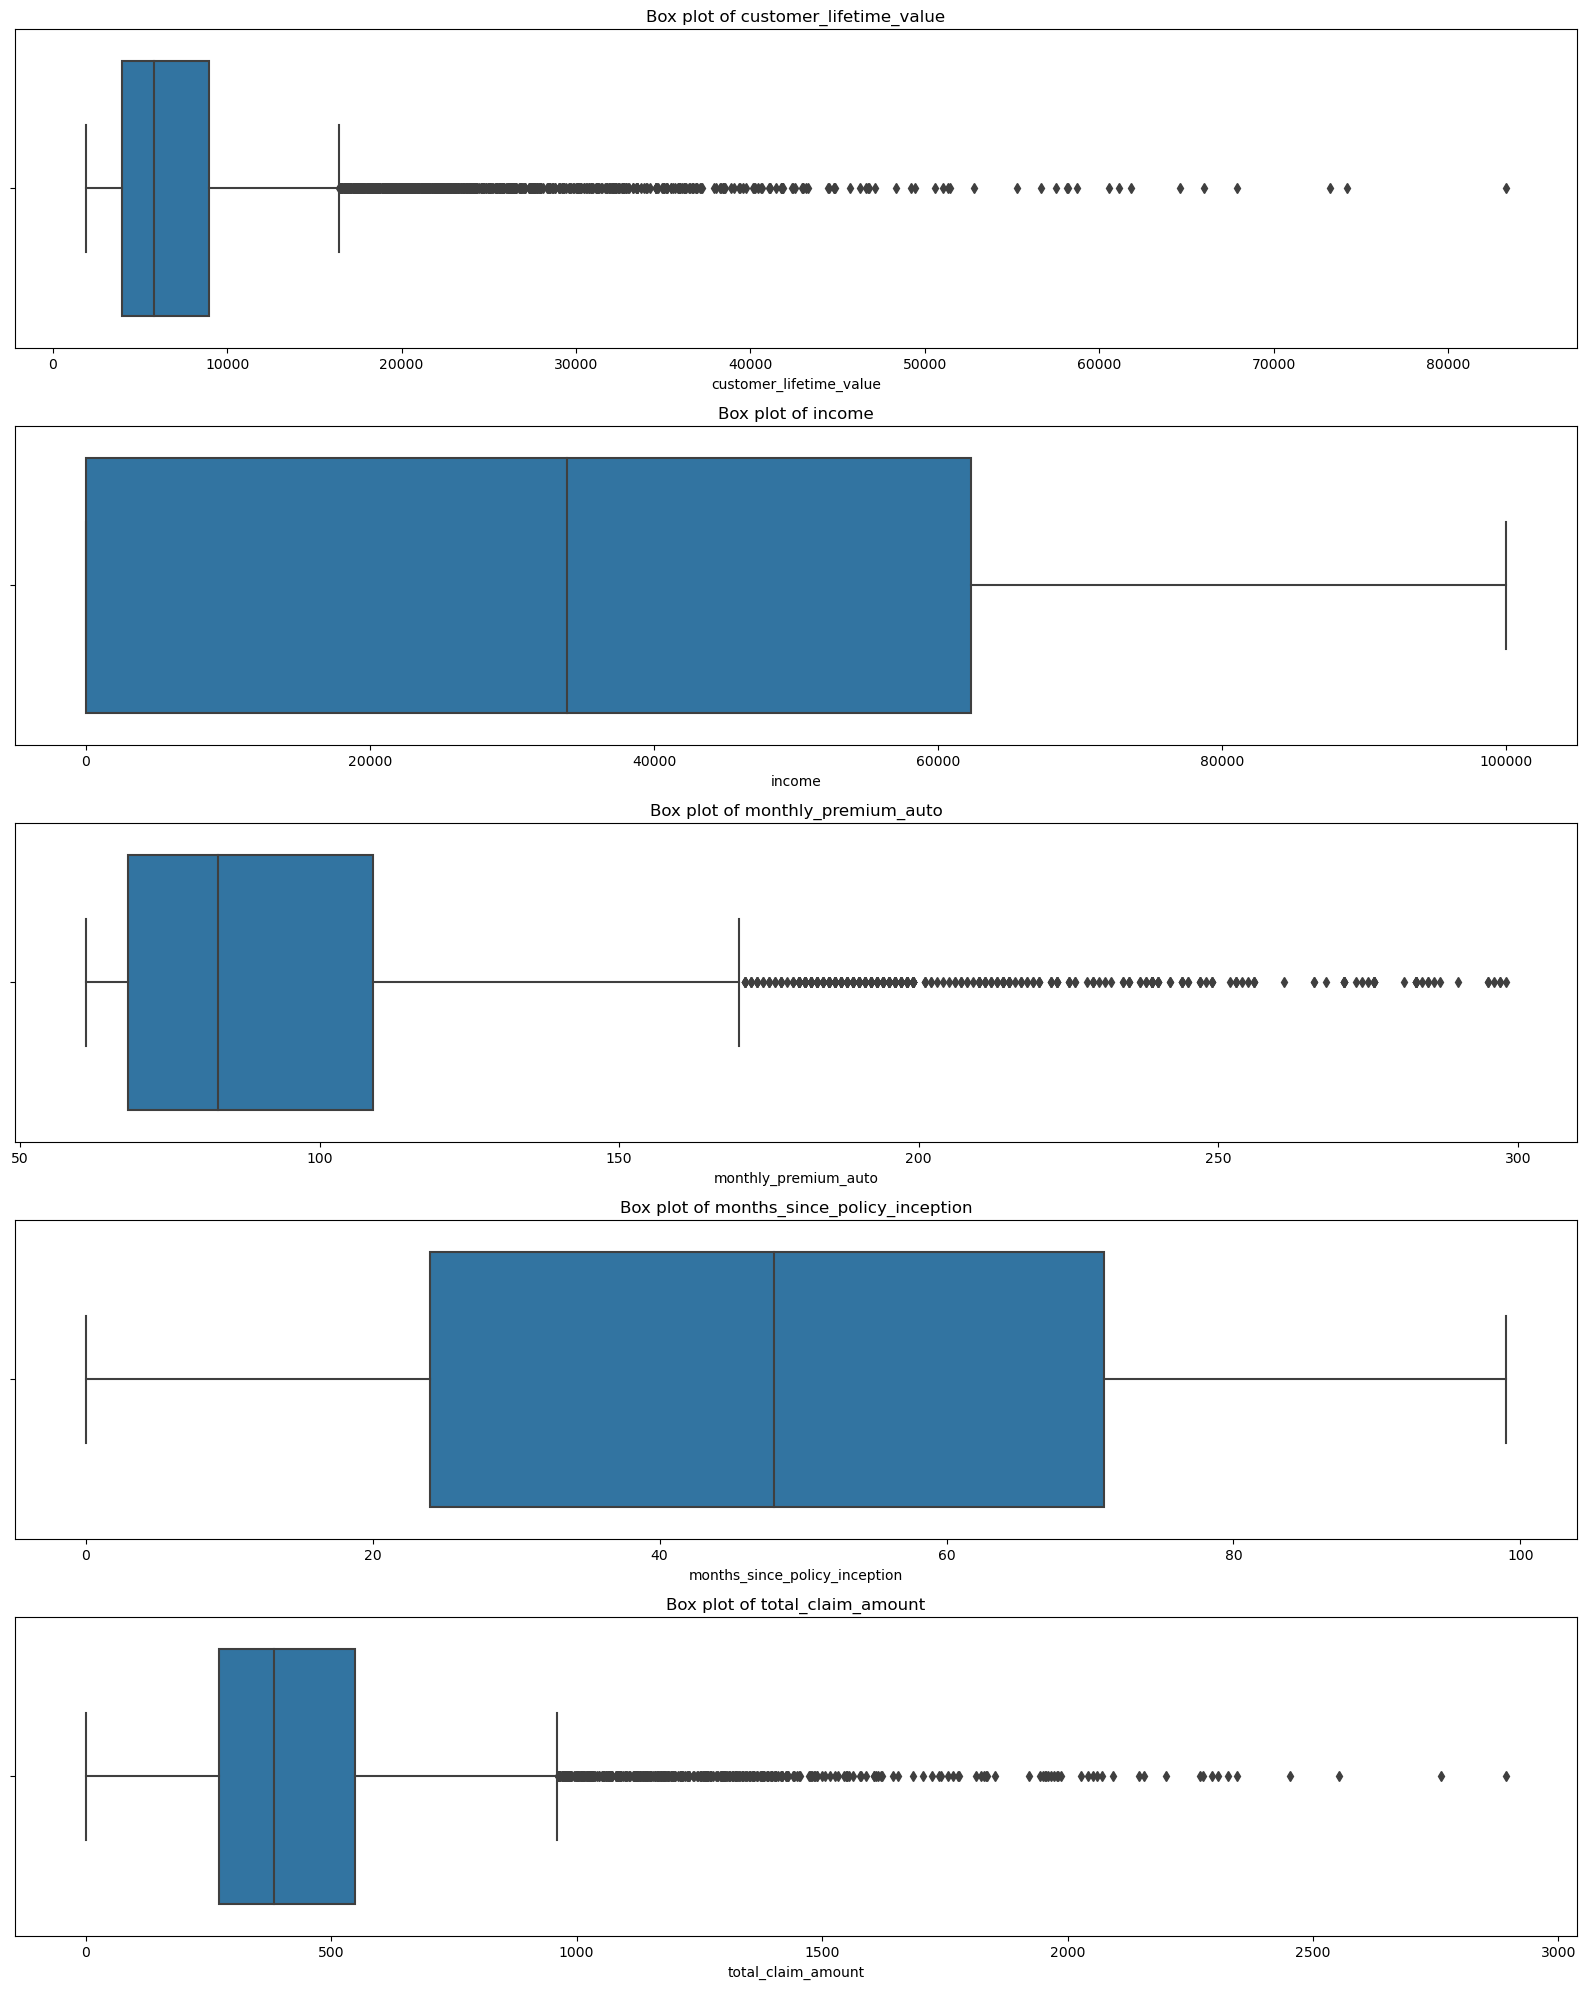

In [13]:
def plot_continuous_boxplots(df):
    """
    Creates box plots for all continuous variables in the dataframe to check for outliers.

    Parameters:
    df (DataFrame): DataFrame containing continuous data.
    """
    num_cols = len(df.columns)
    # Adjust the size of the figure depending on the number of columns
    fig_height = num_cols * 4
    fig, axes = plt.subplots(num_cols, 1, figsize=(16, fig_height))

    for i, col in enumerate(df.columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Box plot of {col}')

    plt.tight_layout()
    plt.show()

# displaying boxplot
plot_continuous_boxplots(continuous_df)



In [14]:
# Define a function that given a pandas DataFrame as input creates a seaborn 
# countplot of each categorical column. Make sure to sort the bars by frequency 
# ie: the most frequent values should be placed first. Hint: use .value_counts(). 
# In addition, if the amount of unique values of a categorical column (cardinality) is six or more, 
# the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

#Function to Create Seaborn Countplot for Each Categorical Column

def plot_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    for column in categorical_columns:
        value_counts = df[column].value_counts().sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        if len(value_counts) >= 6:
            sns.countplot(y=column, data=df, order=value_counts.index)
        else:
            sns.countplot(x=column, data=df, order=value_counts.index)
        plt.title(f'Countplot for {column}')
        plt.show()

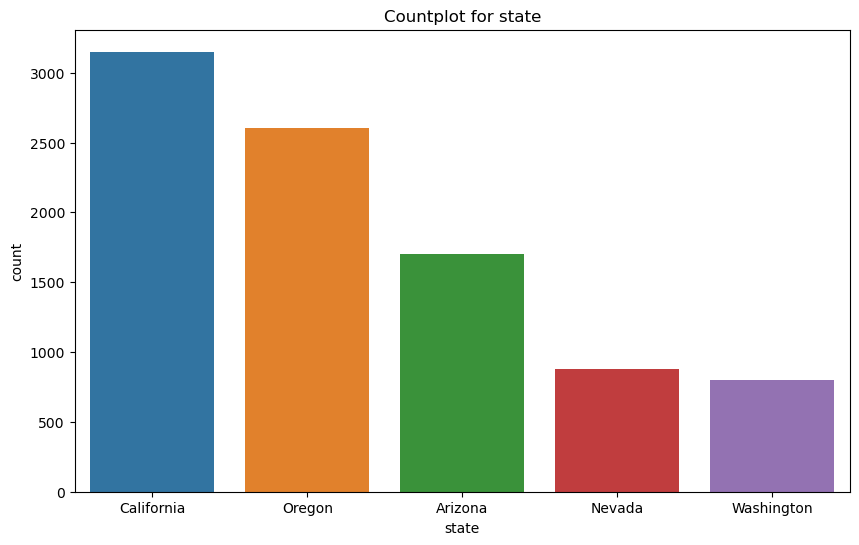

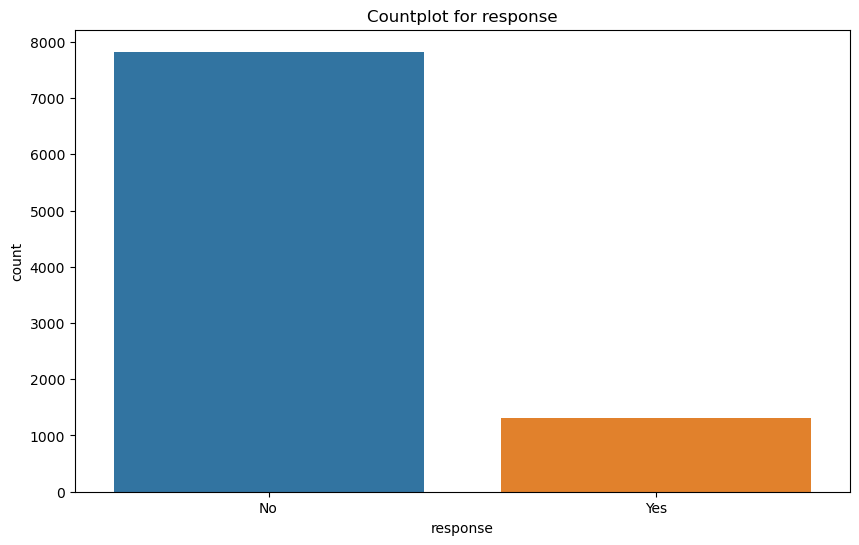

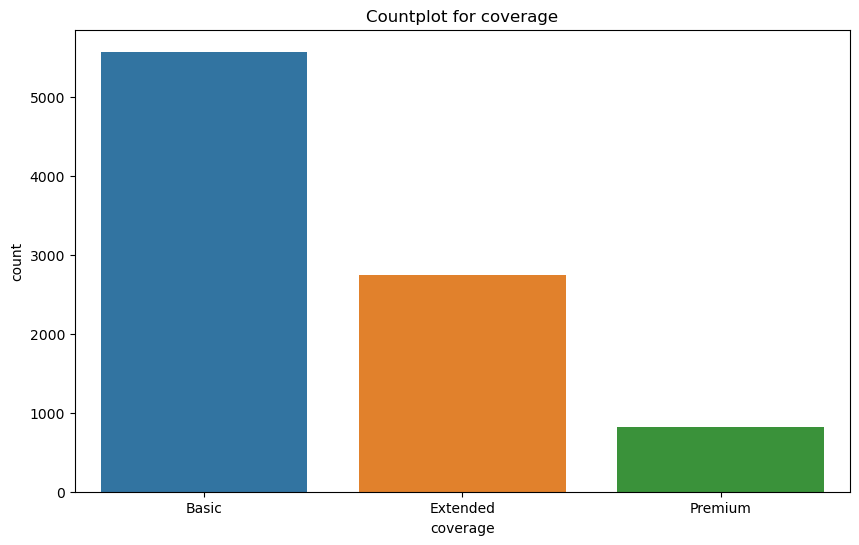

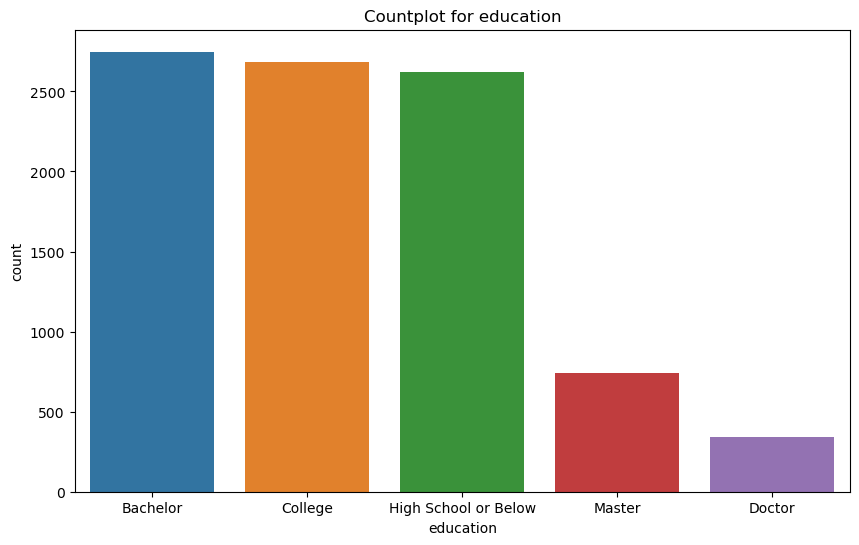

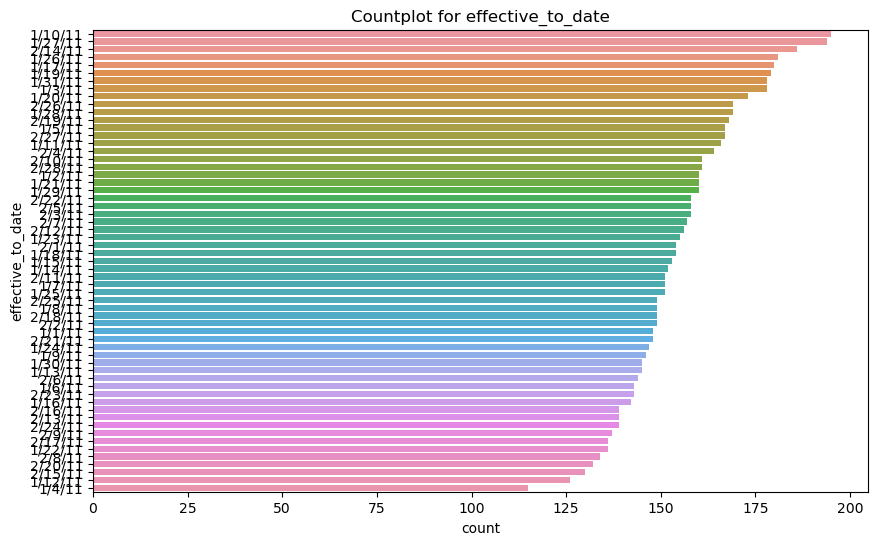

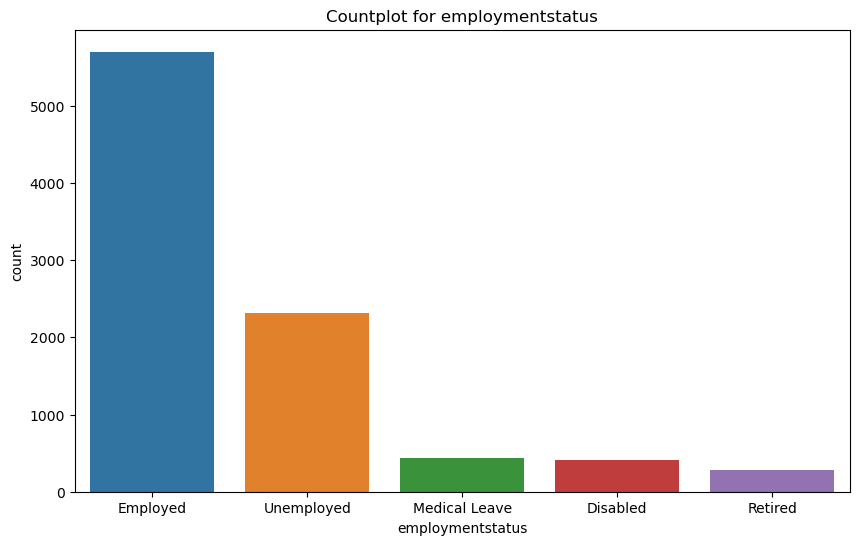

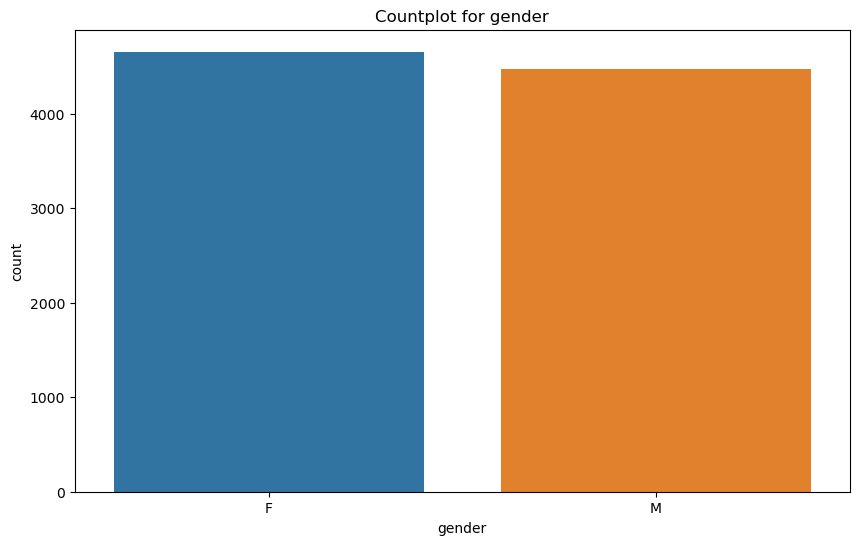

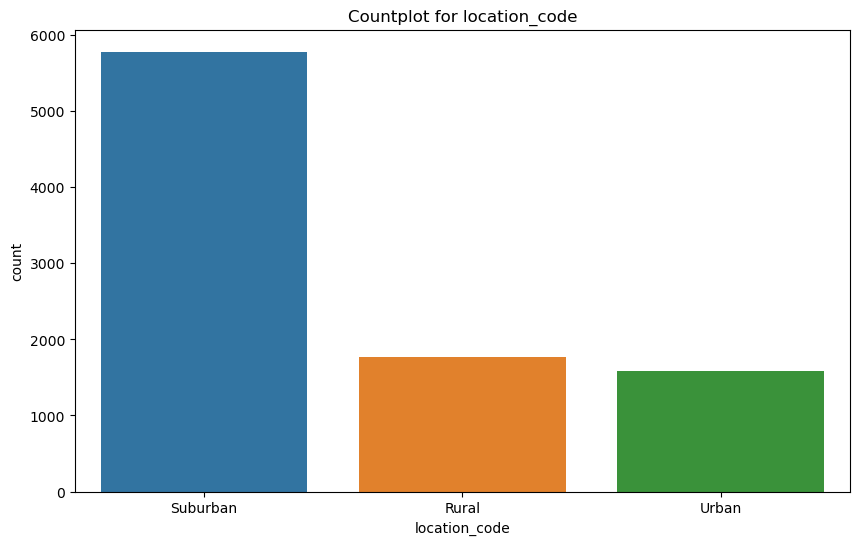

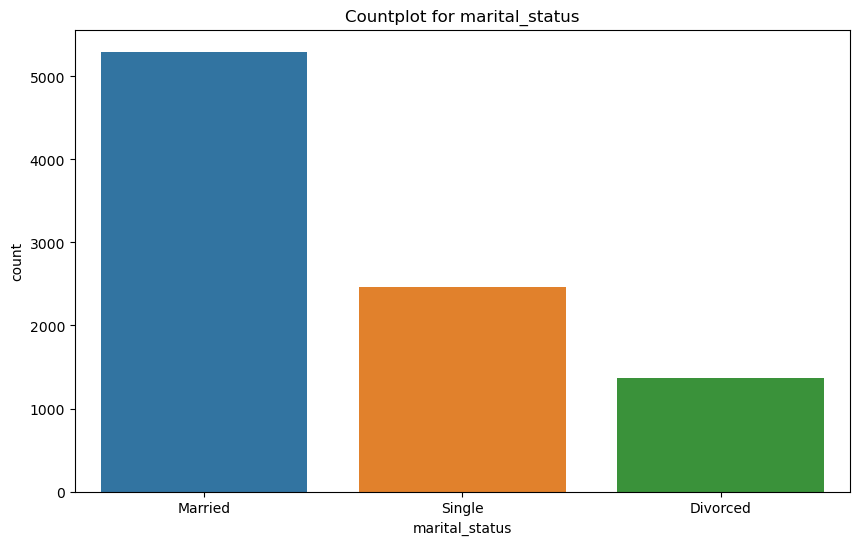

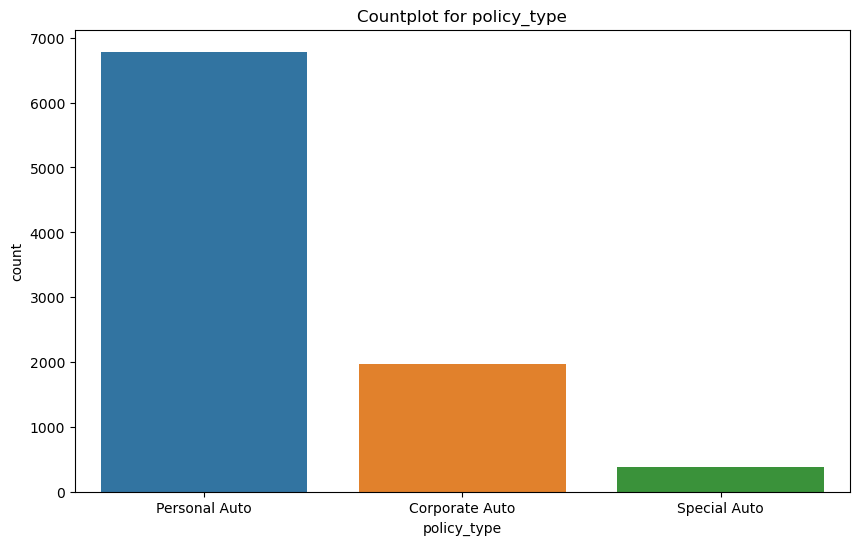

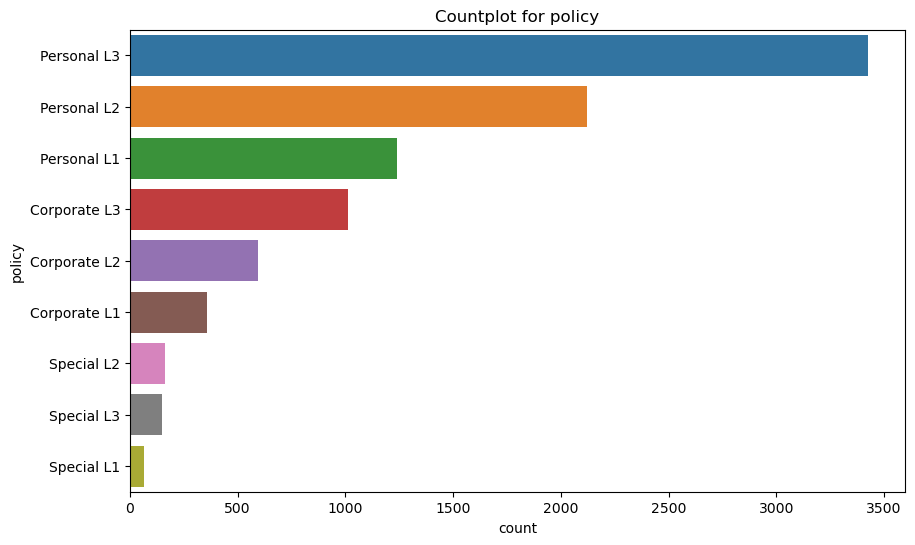

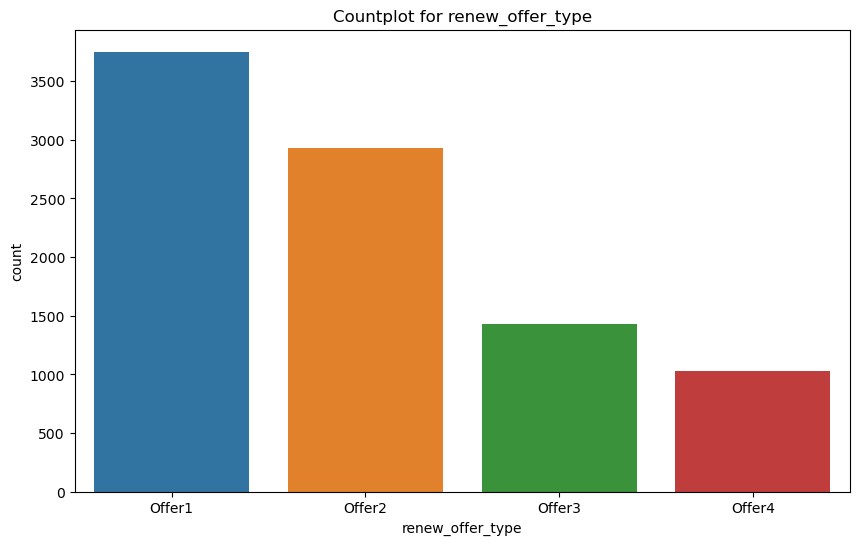

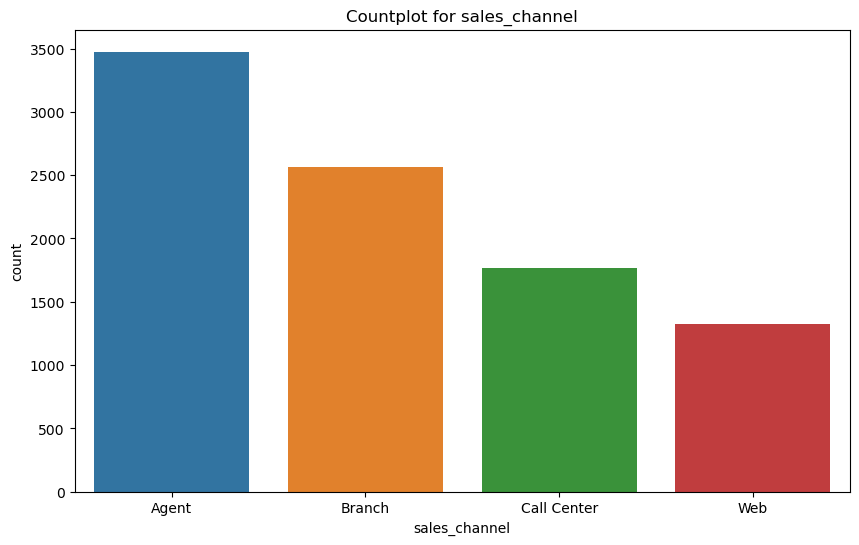

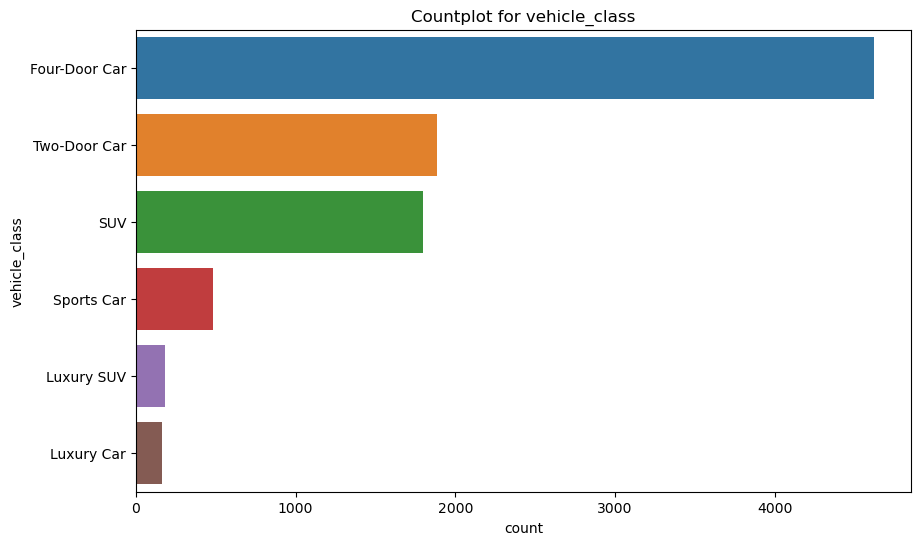

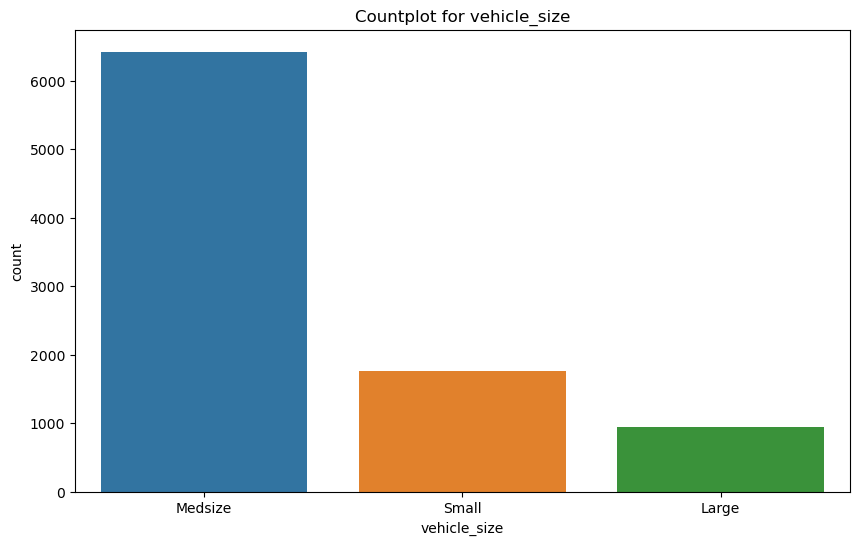

In [15]:
plot_categorical_columns(categorical_df)

In [16]:
#2

# policy_type and policy columns are redundant, and what's worse policy column 
# has a lot of possible unique values (high cardinality) which will be 
# problematic when they will be dummified with an OneHotEncoder because we will 
# increase a lot the number of columns in the dataframe. 
# Drop the column policy_type and transform the column policy to three possible 
# values: L1, L2, and L3 using a function.

#Transforming the 'policy' Column

def transform_policy_column(df):
    df.drop(columns=['policy_type'], inplace=True)
    df['policy'] = df['policy'].apply(lambda x: x[-2:])
    return df


In [17]:
transform_policy_column(categorical_df)

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,L2,Offer3,Branch,Four-Door Car,Large


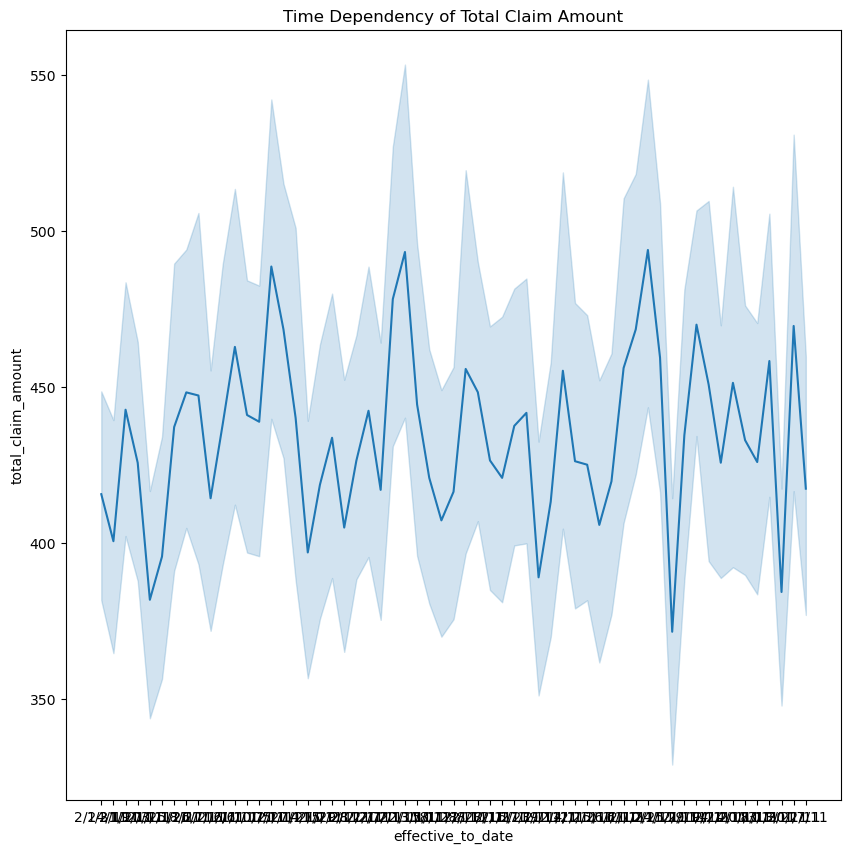

In [18]:
#3

# Time dependency analysis. Use a seaborn line plot using the column 
# effective_to_date to see if total_claim_amount is bigger at some specific dates. 
# Use a figsize=(10,10)

# Time Dependency Analysis, re-merging both cat & num dataframes to realize this

merged_df = numerical_df.join(categorical_df['effective_to_date'])

plt.figure(figsize=(10, 10))
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=merged_df)
plt.title('Time Dependency of Total Claim Amount')
plt.show()


    



In [19]:
#4

# To continue the analysis define an empty pandas DataFrame, 
# and add the following new columns:

#     day with the day number of effective_to_date
#     day_name with the day NAME of effective_to_date
#     week with the week of effective_to_date
#     month with the month NAME of effective_to_date
#     total_claim_amount with total_claim_amount


#changing datatype to date
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'])

# Adding New Time Columns
time_df = pd.DataFrame()
time_df['day'] = categorical_df['effective_to_date'].dt.day
time_df['day_name'] = categorical_df['effective_to_date'].dt.day_name()
time_df['week'] = categorical_df['effective_to_date'].dt.isocalendar().week
time_df['month'] = categorical_df['effective_to_date'].dt.month_name()

time_df['total_claim_amount'] = numerical_df['total_claim_amount']

#displaying the final time df
display(time_df)


C:\Users\antho\AppData\Local\Temp\ipykernel_31320\1987359860.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'])


,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879
...,...,...,...,...,...
9129,10,Thursday,6,February,198.234764
9130,12,Saturday,6,February,379.200000
9131,6,Sunday,5,February,790.784983
9132,3,Thursday,5,February,691.200000


In [20]:
#4

# Compute the total target column aggregated day_name rounded to two decimals 
# and then reorder the index of the resulting pandas series using 
# .reindex(index=list_of_correct_days)

# Computing and Plotting Total Target by Day Name

list_of_correct_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
total_by_day_name = time_df.groupby('day_name')['total_claim_amount'].sum().round(2)

# index reorderinn
total_by_day_name = total_by_day_name.reindex(list_of_correct_days)

# display new df
display(total_by_day_name)




day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

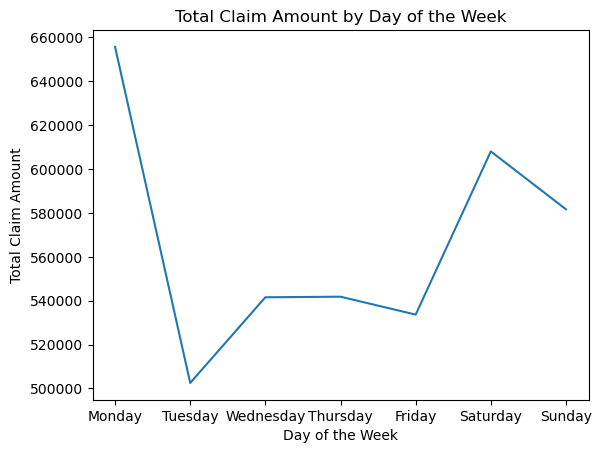

In [21]:
#6
#Use a seaborn line plot to plot the previous series. 
#Do you see some differences by day of the week?

sns.lineplot(data=total_by_day_name)
plt.title('Total Claim Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Claim Amount')
plt.show()

In [22]:
#7

# Get the total number of claims by day of the week name and then reorder 
# the index of the resulting pandas series using .reindex(index=list_of_correct_values)

#Total Number of Claims by Day of the Week

total_claims_by_day = time_df['day_name'].value_counts().reindex(index=list_of_correct_days)

print(total_claims_by_day)


day_name
Monday       1530
Tuesday      1162
Wednesday    1221
Thursday     1249
Friday       1245
Saturday     1397
Sunday       1330
Name: count, dtype: int64


In [23]:
#8

# Get the median "target" by day of the week name and then sort the resulting values in 
# descending order using .sort_values()

#Median Target by Day of the Week


median_target_by_day = time_df.groupby('day_name')['total_claim_amount'].median()
median_target_by_day = median_target_by_day.sort_values(ascending=False)

# Display 
display(median_target_by_day)


day_name
Thursday     395.328407
Wednesday    392.235698
Monday       385.735705
Sunday       383.721164
Saturday     379.200000
Tuesday      378.490829
Friday       371.803029
Name: total_claim_amount, dtype: float64

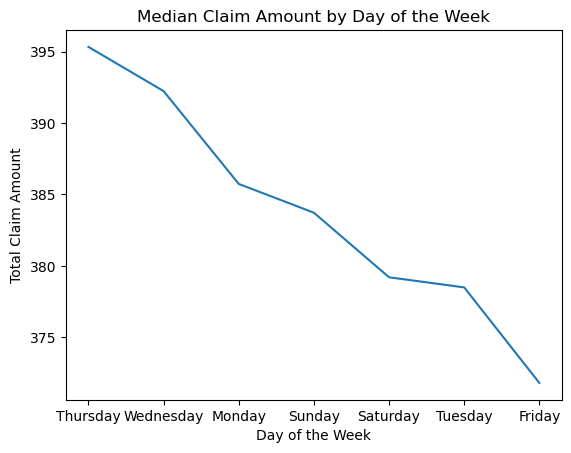

In [24]:
#9
sns.lineplot(median_target_by_day)
plt.title('Median Claim Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Claim Amount')
plt.show()

In [25]:
#11

# Compute the total target column aggregated month rounded to two decimals and then reorder 
# the index of the resulting pandas series using .reindex(index=list_of_correct_values)

#defining correct months
list_of_correct_months = ["January", "February", "March", "April", "May", "June", 
                          "July", "August", "September", "October", "November", "December"]
total_by_month = time_df.groupby('month')['total_claim_amount'].sum().round(2)
#reindexing
total_by_month = total_by_month.reindex(index=list_of_correct_months)

#dislpâying
print(total_by_month)

#12
#NaNs for all month outside of Jan/Feb, analysis is impossible on the whole year 

month
January      2117142.86
February     1847824.19
March               NaN
April               NaN
May                 NaN
June                NaN
July                NaN
August              NaN
September           NaN
October             NaN
November            NaN
December            NaN
Name: total_claim_amount, dtype: float64


In [26]:
display(continuous_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [27]:
#13

# Define a function to remove the outliers of a numerical continuous column depending if a value 
# is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

def remove_outliers(df, column, thr=3):
    mean = df[column].mean()
    std_dev = df[column].std()
    return df[(df[column] <= mean + thr * std_dev) & (df[column] >= mean - thr * std_dev)]

#14 cleaning continuous df

continuous_clean_df = remove_outliers(continuous_df,'customer_lifetime_value')
continuous_clean_df = remove_outliers(continuous_df,'income')
continuous_clean_df = remove_outliers(continuous_df,'monthly_premium_auto')
continuous_clean_df = remove_outliers(continuous_df,'months_since_policy_inception')
continuous_clean_df = remove_outliers(continuous_df,'total_claim_amount')

display(continuous_clean_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [28]:
#15
# Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column 
# of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows 
# (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have 
# NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix 
# the final dataframe.

concatenated_df = pd.concat([continuous_clean_df, discrete_df, categorical_df, time_df], axis=1)
concatenated_df.dropna(inplace=True)
#reset index
concatenated_df.reset_index(drop=True, inplace=True)

display(concatenated_df)



,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February,384.811147
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January,1131.464935
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February,566.472247
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January,529.881344
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,198.234764,18,0,2,California,No,...,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday,6,February,198.234764
8972,3096.511217,21604.0,79.0,28.0,379.200000,14,0,1,California,Yes,...,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,6,February,379.200000
8973,8163.890428,0.0,85.0,37.0,790.784983,9,3,2,California,No,...,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,5,February,790.784983
8974,7524.442436,21941.0,96.0,3.0,691.200000,34,0,3,California,No,...,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,5,February,691.200000


In [29]:
#16 reorder for total claim to be at the last place 

columns = [col for col in concatenated_df.columns if col != 'total_claim_amount'] + ['total_claim_amount']
concatenated_df = concatenated_df[columns]

display(concatenated_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,No,Basic,...,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February,384.811147,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,No,Extended,...,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January,1131.464935,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,No,Premium,...,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February,566.472247,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,No,Basic,...,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January,529.881344,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,No,Basic,...,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February,138.130879,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,18,0,2,California,No,Basic,...,Offer2,Web,Four-Door Car,Medsize,10,Thursday,6,February,198.234764,198.234764
8972,3096.511217,21604.0,79.0,28.0,14,0,1,California,Yes,Extended,...,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,6,February,379.200000,379.200000
8973,8163.890428,0.0,85.0,37.0,9,3,2,California,No,Extended,...,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,5,February,790.784983,790.784983
8974,7524.442436,21941.0,96.0,3.0,34,0,3,California,No,Extended,...,Offer3,Branch,Four-Door Car,Large,3,Thursday,5,February,691.200000,691.200000


In [30]:
#17 turn Response Column into yes/no

concatenated_df['response'] = concatenated_df['response'].map({'Yes': 1, 'No': 0})

display(concatenated_df['response'])



0       0
1       0
2       0
3       0
4       0
       ..
8971    0
8972    1
8973    0
8974    0
8975    0
Name: response, Length: 8976, dtype: int64

In [31]:
#18
# # Reduce the class imbalance in education by grouping together ["Master","Doctor"] into 
# "Graduate" while keeping the other possible values as they are. In this way, you will reduce
# a bit the class imbalance at the price of losing a level of detail.

concatenated_df['education'] = concatenated_df['education'].replace(['Master', 'Doctor'], 'Graduate')

#19
concatenated_df['employmentstatus'] = concatenated_df['employmentstatus'].replace(['Medical Leave', 'Disabled', 'Retired'], 'Inactive')

concatenated_df['education'].unique()
concatenated_df['employmentstatus'].unique()


array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

In [32]:
#20
# Reduce the class imbalance of the employmentstatus column grouping together 
# ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible 
# values as they are. In this way, you will reduce a bit the class imbalance at the price of losing 
# a level of detail.

concatenated_df['gender'] = concatenated_df['gender'].map({'F': 0, 'M': 1})
concatenated_df['gender'].unique()

array([0, 1], dtype=int64)

In [33]:
#21
# Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", 
# and "Luxury Car" into a common group called Luxury leaving the other values as they are. 
# In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
# Grouping Vehicle Class


concatenated_df['vehicle_class'] = concatenated_df['vehicle_class'].replace(['Sports Car', 'Luxury SUV', 'Luxury Car'], 'Luxury')
concatenated_df['vehicle_class'].unique()


array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

In [34]:

#Encoding Ordinal Categorical Columns


#22
coverage_map = {'Premium': 3, 'Extended': 2, 'Basic': 1}
concatenated_df['coverage'] = concatenated_df['coverage'].map(coverage_map)
#23
employmentstatus_map = {'Employed': 3, 'Inactive': 2, 'Unemployed': 1}
concatenated_df['employmentstatus'] = concatenated_df['employmentstatus'].map(employmentstatus_map)
#24
location_code_map = {'Urban': 3, 'Suburban': 2, 'Rural': 1}
concatenated_df['location_code'] = concatenated_df['location_code'].map(location_code_map)
#25
vehicle_size_map = {'Large': 3, 'Medsize': 2, 'Small': 1}
concatenated_df['vehicle_size'] = concatenated_df['vehicle_size'].map(vehicle_size_map)

display(concatenated_df)


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,1,...,Offer1,Agent,Two-Door Car,2,24,Thursday,8,February,384.811147,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,2,...,Offer3,Agent,Four-Door Car,2,31,Monday,5,January,1131.464935,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,3,...,Offer1,Agent,Two-Door Car,2,19,Saturday,7,February,566.472247,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,0,1,...,Offer1,Call Center,SUV,2,20,Thursday,3,January,529.881344,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,0,1,...,Offer1,Agent,Four-Door Car,2,3,Thursday,5,February,138.130879,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,18,0,2,California,0,1,...,Offer2,Web,Four-Door Car,2,10,Thursday,6,February,198.234764,198.234764
8972,3096.511217,21604.0,79.0,28.0,14,0,1,California,1,2,...,Offer1,Branch,Four-Door Car,2,12,Saturday,6,February,379.200000,379.200000
8973,8163.890428,0.0,85.0,37.0,9,3,2,California,0,2,...,Offer1,Branch,Four-Door Car,2,6,Sunday,5,February,790.784983,790.784983
8974,7524.442436,21941.0,96.0,3.0,34,0,3,California,0,2,...,Offer3,Branch,Four-Door Car,3,3,Thursday,5,February,691.200000,691.200000


In [35]:
#26
#Getting DataFrame with Categorical Nominal Columns

nominal_columns = concatenated_df[['sales_channel', 'state', 'response', 'renew_offer_type', 'vehicle_class']]

#27
#creating the levels list

levels = [list(nominal_columns[col].unique()) for col in nominal_columns]

print(levels)

[['Agent', 'Call Center', 'Web', 'Branch'], ['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], [0, 1], ['Offer1', 'Offer3', 'Offer2', 'Offer4'], ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']]


In [36]:
# Instantiating OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories=levels)





    1 - Define X and y
    
    2 - Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31
    
    3 - Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)
    
    4 - Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use .toarray() after .transform() to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using encoder.get_feature_names_out() and the same indexes of X_train_cat and X_test_cat
    
    5 - Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as: X_train_num_transformed_df and X_test_num_transformed_df
    
    6 - Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new
    
    7 - Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. Create new pandas dataframes from the resulting numpy arrays. Remember to set the correct columns names and indexes. Name the resulting dataframes as: X_train_new_scaled_df and X_test_new_scaled_df
    
    8 - Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets
    
    9 - Create a function that given a model prediction and real values returns a pandas dataframe with the following table:

Error_metric 	Value 
MAE 	value
MSE 	value
RMSE 	value
MAPE 	value
R2 	value

    10 - Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets
    
   11 -  Now define a function that takes as an input: list of models, X_train and y_train to train several model (with default values) so we can train a lot of them without repeating code. The function must return the list of trained models.
    Use the function to train the following models (with default settings):

*LinearRegressor

*KNeighborsRegressor

*MLPRegressor

   11 -  Evaluate the models with the function created earlier in the TRAIN and TEST sets. Which model performs best with the default options?


In [39]:
#1 - defining X& Y
X = concatenated_df.drop('total_claim_amount', axis=1)
y = concatenated_df['total_claim_amount']

In [40]:
#2 - realizing split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=66)

In [43]:
concatenated_df.dtypes

customer_lifetime_value                 float64
income                                  float64
monthly_premium_auto                    float64
months_since_policy_inception           float64
months_since_last_claim                   int64
number_of_open_complaints                 int64
number_of_policies                        int64
state                                    object
response                                  int64
coverage                                  int64
education                                object
effective_to_date                datetime64[ns]
employmentstatus                          int64
gender                                    int64
location_code                             int64
marital_status                           object
policy                                   object
renew_offer_type                         object
sales_channel                            object
vehicle_class                            object
vehicle_size                            

In [52]:
#3 separating num & cat 

#droping effective_to_date as it breaks my Powertransformer (error in understanding datetime format, i've tried to convert as an integer, without success)

concatenated_df = concatenated_df.drop('effective_to_date', axis=1)


num = ['customer_lifetime_value','income','monthly_premium_auto','months_since_policy_inception',
       'months_since_last_claim','number_of_open_complaints','number_of_policies','response','coverage',
       'employmentstatus','gender','location_code','vehicle_size','day','week']  

cat = ['state','education','marital_status','policy','renew_offer_type','sales_channel','vehicle_class','day_name','month']  

X_train_cat = X_train[cat]
X_train_num = X_train[num]
X_test_cat = X_test[cat]
X_test_num = X_test[num]

In [53]:
#Encode cat values in onehotencoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')  
encoder.fit(X_train_cat) 

# convert to DataFrame
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat).toarray(), 
                                   columns=encoder.get_feature_names_out(), 
                                   index=X_train_cat.index)
X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test_cat).toarray(), 
                                  columns=encoder.get_feature_names_out(), 
                                  index=X_test_cat.index)

In [54]:
#now encoding num values with powertransformer

from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()
transformer.fit(X_train_num) 

# converting to DataFrame
X_train_num_transformed_df = pd.DataFrame(transformer.transform(X_train_num), 
                                          columns=X_train_num.columns, 
                                          index=X_train_num.index)
X_test_num_transformed_df = pd.DataFrame(transformer.transform(X_test_num), 
                                         columns=X_test_num.columns, 
                                         index=X_test_num.index)

In [55]:
#contact the transformerd/scaled dataframes
X_train_new = pd.concat([X_train_num_transformed_df, X_train_cat_encoded], axis=1)
X_test_new = pd.concat([X_test_num_transformed_df, X_test_cat_encoded], axis=1)


In [56]:
#7

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_new) 

# convert to DataFrame
X_train_new_scaled_df = pd.DataFrame(scaler.transform(X_train_new), 
                                     columns=X_train_new.columns, 
                                     index=X_train_new.index)
X_test_new_scaled_df = pd.DataFrame(scaler.transform(X_test_new), 
                                    columns=X_test_new.columns, 
                                    index=X_test_new.index)

In [57]:
#8 

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_new_scaled_df, y_train)

# launch pred
train_pred = lr.predict(X_train_new_scaled_df)
test_pred = lr.predict(X_test_new_scaled_df)


In [58]:
#9 create error metrics table

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def error_metrics(y_true, y_pred):
    results = {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAPE": np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
        "R2": r2_score(y_true, y_pred)
    }
    return pd.DataFrame(results, index=["Value"])

In [62]:
#checking error metrics

# Train set
train_metrics = error_metrics(y_train, train_pred)

# Test set
test_metrics = error_metrics(y_test, test_pred)

print(train_metrics)
print('-----------')
print(test_metrics)

              MAE           MSE        RMSE        MAPE        R2
Value  126.365857  27413.970224  165.571647  173.133095  0.531173
-----------
              MAE           MSE        RMSE        MAPE        R2
Value  129.686385  29014.519586  170.336489  109.601269  0.541351


In [ ]:
#results between train & test sets seems reasonably close, R2 is not great

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

def train_models(models, X_train, y_train):
    trained_models = []
    for model in models:
        model.fit(X_train, y_train)
        trained_models.append(model)
    return trained_models

models = [LinearRegression(), KNeighborsRegressor(), MLPRegressor()]
trained_models = train_models(models, X_train_new_scaled_df, y_train)


C:\Users\antho\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# #got an error : C:\Users\antho\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
#   warnings.warn(


In [72]:
# Train models
models = [LinearRegression(), KNeighborsRegressor(), MLPRegressor()]
trained_models = train_models(models, X_train_new_scaled_df, y_train)

# predict and evaluate lin regression, KN, MLPReg
for model in trained_models:
    train_pred = model.predict(X_train_new_scaled_df)
    test_pred = model.predict(X_test_new_scaled_df)
    
    # Evaluate on Train and Test sets
    train_metrics = error_metrics(y_train, train_pred)
    test_metrics = error_metrics(y_test, test_pred)
    
    print(f"Model: {type(model).__name__}")
    print("Train Metrics:")
    print(train_metrics)
    print("Test Metrics:")
    print(test_metrics)
    print("----------")


Model: LinearRegression
Train Metrics:
              MAE           MSE        RMSE        MAPE        R2
Value  126.365857  27413.970224  165.571647  173.133095  0.531173
Test Metrics:
              MAE           MSE        RMSE        MAPE        R2
Value  129.686385  29014.519586  170.336489  109.601269  0.541351
----------
Model: KNeighborsRegressor
Train Metrics:
              MAE           MSE        RMSE        MAPE        R2
Value  112.578546  24145.229152  155.387352  208.085424  0.587074
Test Metrics:
              MAE           MSE        RMSE        MAPE        R2
Value  142.856589  38046.076814  195.054036  164.594628  0.398584
----------
Model: MLPRegressor
Train Metrics:
             MAE           MSE        RMSE        MAPE        R2
Value  99.898382  19412.521105  139.328824  132.245225  0.668011
Test Metrics:
              MAE           MSE        RMSE      MAPE        R2
Value  103.139151  20738.665088  144.009253  81.93068  0.672172
----------


C:\Users\antho\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# MLPRegressor seems the bestmodel: 
#lower MAE, MSE, RMSE on both train & test sets, and highest R2,
